# 3 different RNN for Sentiment Analysis
![](https://image.slidesharecdn.com/aimeet-19nov-161122070451/95/introduction-to-recurrent-neural-network-with-application-to-sentiment-analysis-artifacia-ai-meet-12-638.jpg?cb=1479798476)

## RNNレイヤーの役割
### Input
- input_dim: 3D tensor
- input_shape: `(batch_size, timesteps, input_features)`

### output  
1. Either the full sequences of successive outputs for each timestep  
　- output_dim: 3D tensor   
　- output_shape: `(batch_size, timesteps, output_features)`  
2. Only the last output for each input sequence   
　- output_dim: 2D tensor   
　- output_shape: `(batch_size, output_features)`  
  
These two modes are controlled by the `return_sequences` constructor argument. 

---------
model1: return_sequences = False　の場合

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

def SimpleRNN_model(return_sequences=False, return_state=False):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=32))
    model.add(SimpleRNN(units=32, return_sequences=return_sequences, return_state=return_state))
    model.add(Dense(1, activation='sigmoid'))
    return model

model1 = SimpleRNN_model()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


-----------------------
model2: return_sequences = True　の場合

In [19]:
model2 = SimpleRNN_model(return_sequences=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


-----------
model3: Stacking RNN　の場合

In [41]:
def Stacking_RNN_model():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=32))
    model.add(SimpleRNN(units=32, return_sequences=True))
    model.add(SimpleRNN(32, return_sequences=True))
    model.add(SimpleRNN(32, return_sequences=True))
    model.add(SimpleRNN(32, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    return model

model3 = Stacking_RNN_model()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


## Preprocessing IMBD dataset for Sentiment Analysis

In [31]:
from keras.datasets import imdb

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [33]:
len(input_train[0])

218

In [34]:
len(input_train[1])

189

In [35]:
input_train[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

input_dataには、可変長のidが当てられたコメントが入っている

In [36]:
# labelはバイナリ
y_train[:5]

array([1, 0, 0, 1, 0])

In [32]:
# hyper params
MAX_LEN = 500

In [37]:
# padding
from keras.preprocessing.sequence import pad_sequences

input_train = pad_sequences(input_train, maxlen=MAX_LEN)
input_test = pad_sequences(input_test, maxlen=MAX_LEN)

In [38]:
print(len(input_train[0]))
print(len(input_train[1]))
print(len(input_train[2]))

500
500
500


固定長に変換成功!

In [39]:
print(input_train.shape, input_test.shape)

(25000, 500) (25000, 500)


In [42]:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [43]:
# difiine hyperparams
NUM_EPOCH = 5
BATCH_SIZE = 32

In [45]:
history1 = model1.fit(input_train, y_train,
                    epochs=NUM_EPOCH,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 95s 5ms/step - loss: 0.5437 - acc: 0.7158 - val_loss: 0.4281 - val_acc: 0.8134
Epoch 2/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.3442 - acc: 0.8609 - val_loss: 0.3723 - val_acc: 0.8452
Epoch 3/5
20000/20000 [==============================] - 93s 5ms/step - loss: 0.2887 - acc: 0.8864 - val_loss: 0.3549 - val_acc: 0.8644
Epoch 4/5
20000/20000 [==============================] - 93s 5ms/step - loss: 0.2462 - acc: 0.9053 - val_loss: 0.4182 - val_acc: 0.8356
Epoch 5/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2010 - acc: 0.9246 - val_loss: 0.4874 - val_acc: 0.7908


In [46]:
history2 = model1.fit(input_train, y_train,
                    epochs=NUM_EPOCH,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 95s 5ms/step - loss: 0.1595 - acc: 0.9425 - val_loss: 0.4236 - val_acc: 0.8450
Epoch 2/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1184 - acc: 0.9564 - val_loss: 0.4665 - val_acc: 0.8474
Epoch 3/5
20000/20000 [==============================] - 91s 5ms/step - loss: 0.0817 - acc: 0.9711 - val_loss: 0.5230 - val_acc: 0.8296
Epoch 4/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.0609 - acc: 0.9790 - val_loss: 0.6251 - val_acc: 0.8068
Epoch 5/5
20000/20000 [==============================] - 95s 5ms/step - loss: 0.0436 - acc: 0.9847 - val_loss: 0.6981 - val_acc: 0.8036


In [47]:
history3 = model1.fit(input_train, y_train,
                    epochs=NUM_EPOCH,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 92s 5ms/step - loss: 0.0391 - acc: 0.9873 - val_loss: 0.7338 - val_acc: 0.8110
Epoch 2/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.0276 - acc: 0.9917 - val_loss: 0.8319 - val_acc: 0.7914
Epoch 3/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.0213 - acc: 0.9932 - val_loss: 0.8666 - val_acc: 0.7910
Epoch 4/5
20000/20000 [==============================] - 94s 5ms/step - loss: 0.0174 - acc: 0.9949 - val_loss: 0.9220 - val_acc: 0.7850
Epoch 5/5
20000/20000 [==============================] - 93s 5ms/step - loss: 0.0147 - acc: 0.9949 - val_loss: 0.9259 - val_acc: 0.8212


Let's display the training and validation loss and accuracy:

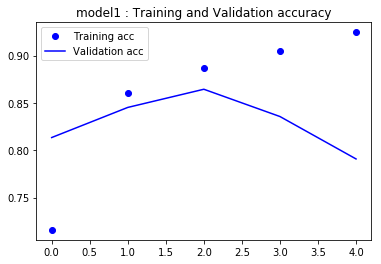

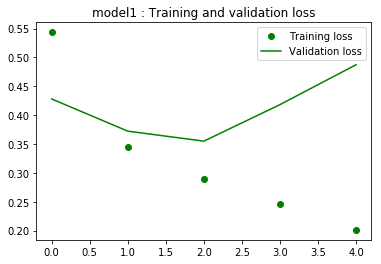

------------------------------------------------------------


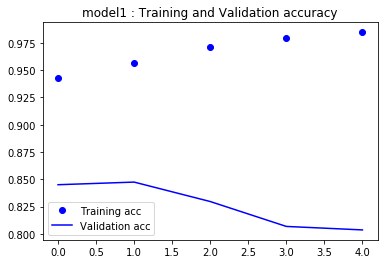

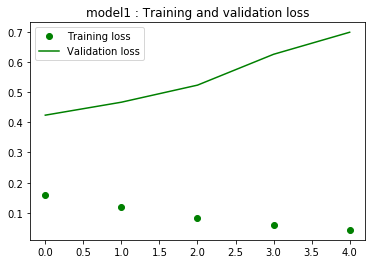

------------------------------------------------------------


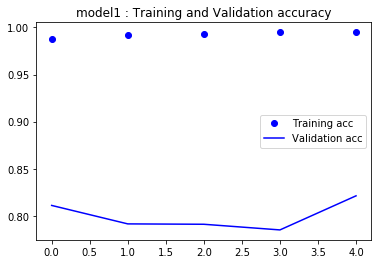

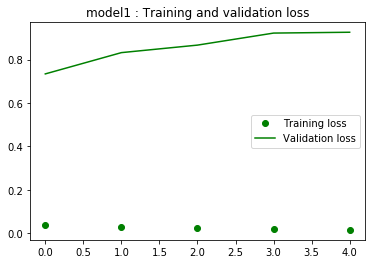

------------------------------------------------------------


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

history_list = [history1, history2, history3]

for h in history_list:
    acc = h.history['acc']
    val_acc = h.history['val_acc']
    loss = h.history['loss']
    val_loss = h.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('model%s : Training and Validation accuracy'%str(i))
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss', color='green', )
    plt.plot(epochs, val_loss, 'b', label='Validation loss', color='green', )
    plt.title('model%s : Training and validation loss'%str(i))
    plt.legend()

    plt.show()
    print("------------------------------------------------------------")

### まとめ
- 総じてSimpleRNNが一番いい
- バッチサイズ変えたりしたい

## LSTMでもやってみる

In [ ]:
from keras.layers import LSTM

def LSTM_Buider(VOCAB_SIZE, EMBEDDING_DIM, MAX_LEN):
    model = Sequential()
    model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN)
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
VOCAB_SIZE = 10000
EMBEDDING_DIM = 64
MAX_LEN = 500

lstm_model = LSTM_Buider(VOCAB_SIZE, MAX_LEN)
lstm_model.summary()

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(input_train, y_train,
                     epochs=10,
                     batch_size=128,
                     validation_split=0.2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('LSTM Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM Training and validation loss')
plt.legend()

plt.show()